In [1]:
import pandas as pd
from visualise_pressreleases_to_newspaper_uptake import visualise_pressreleases_to_newspaper_uptake

In [2]:
fname = "Results_frames.xlsx"
df = pd.read_excel(fname, na_values=['nan'],converters={'New Number':str})

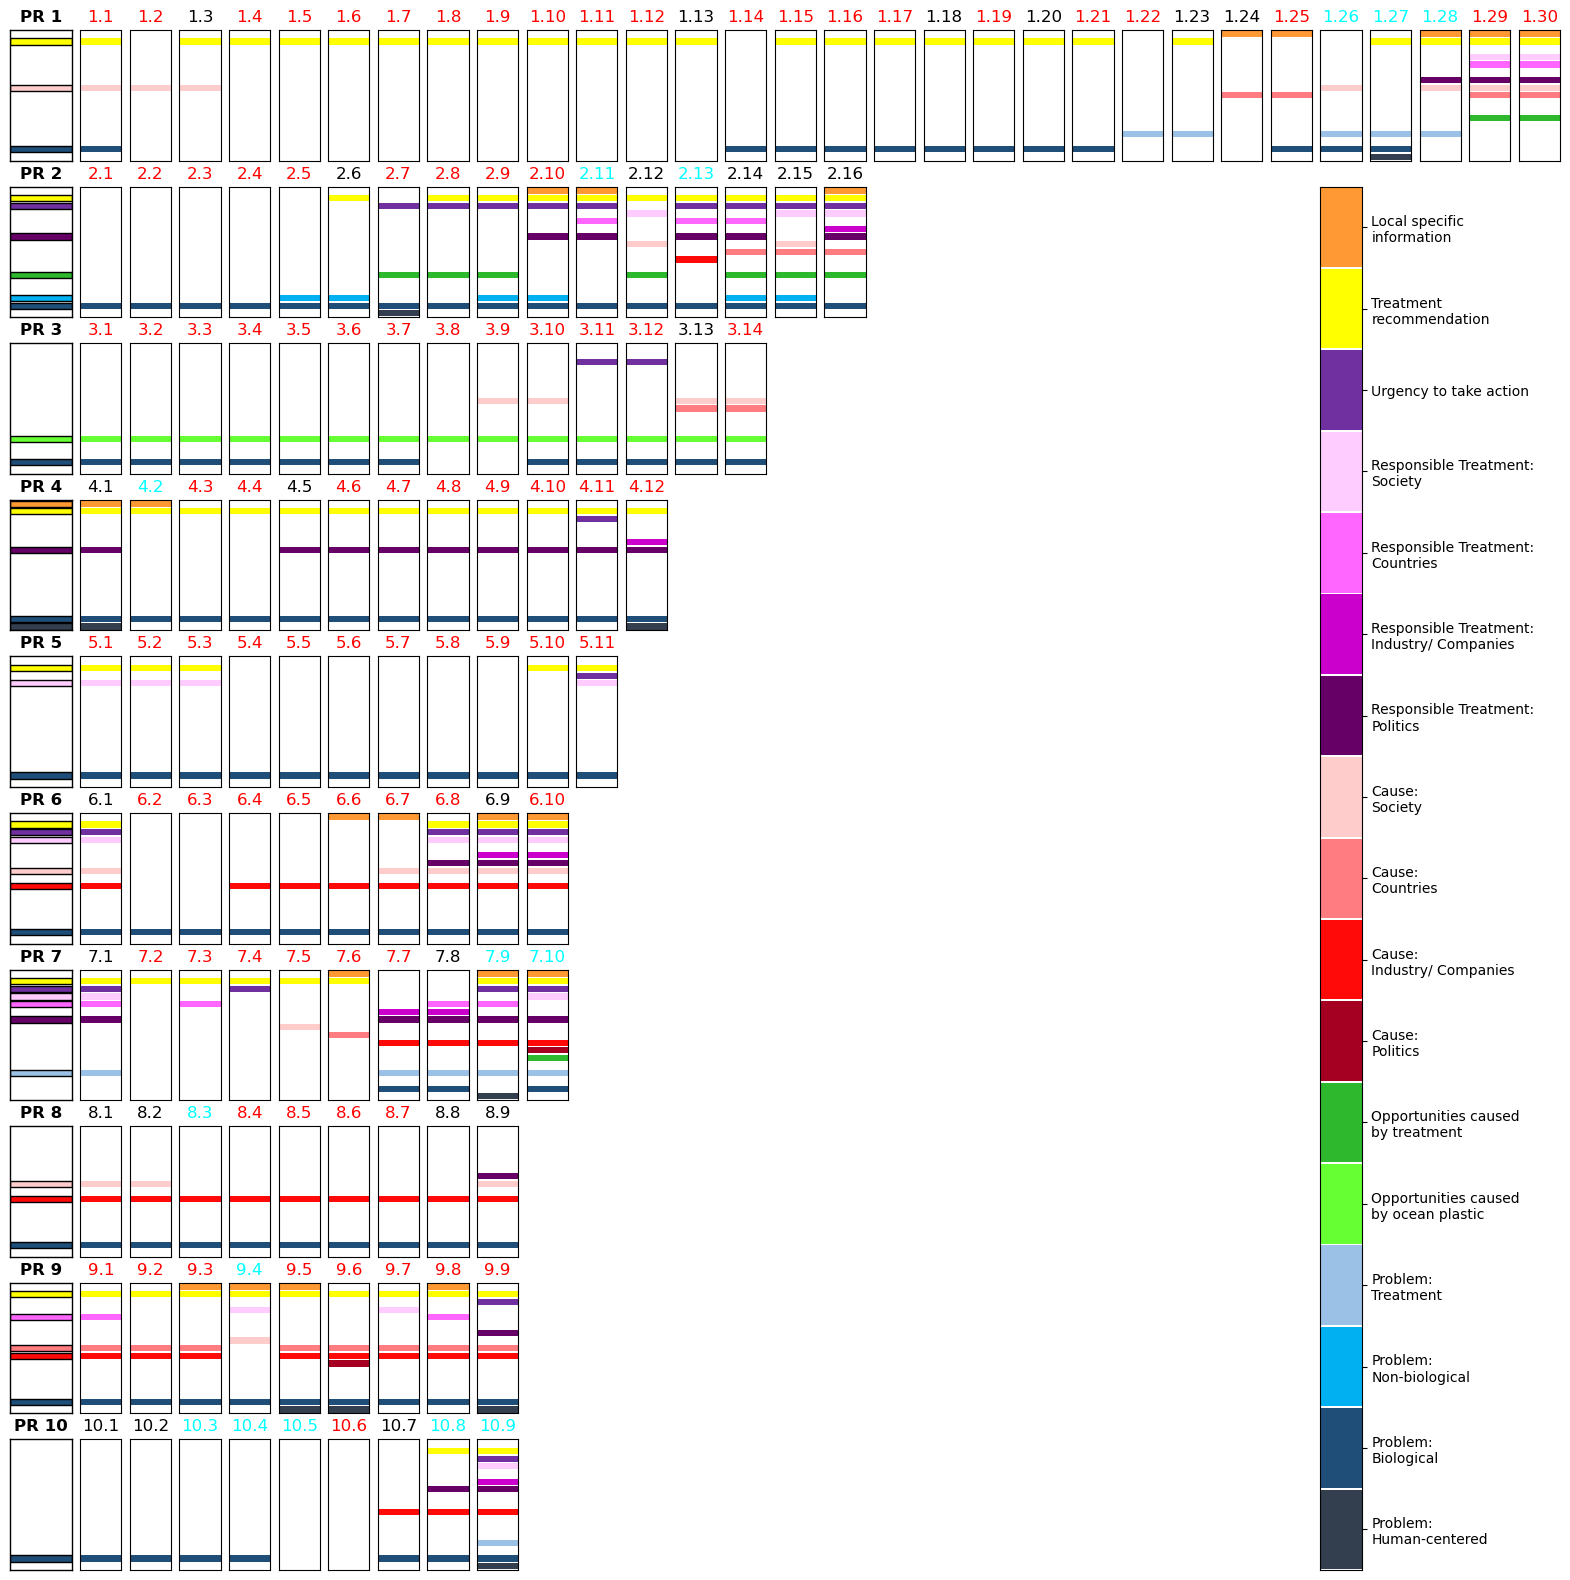

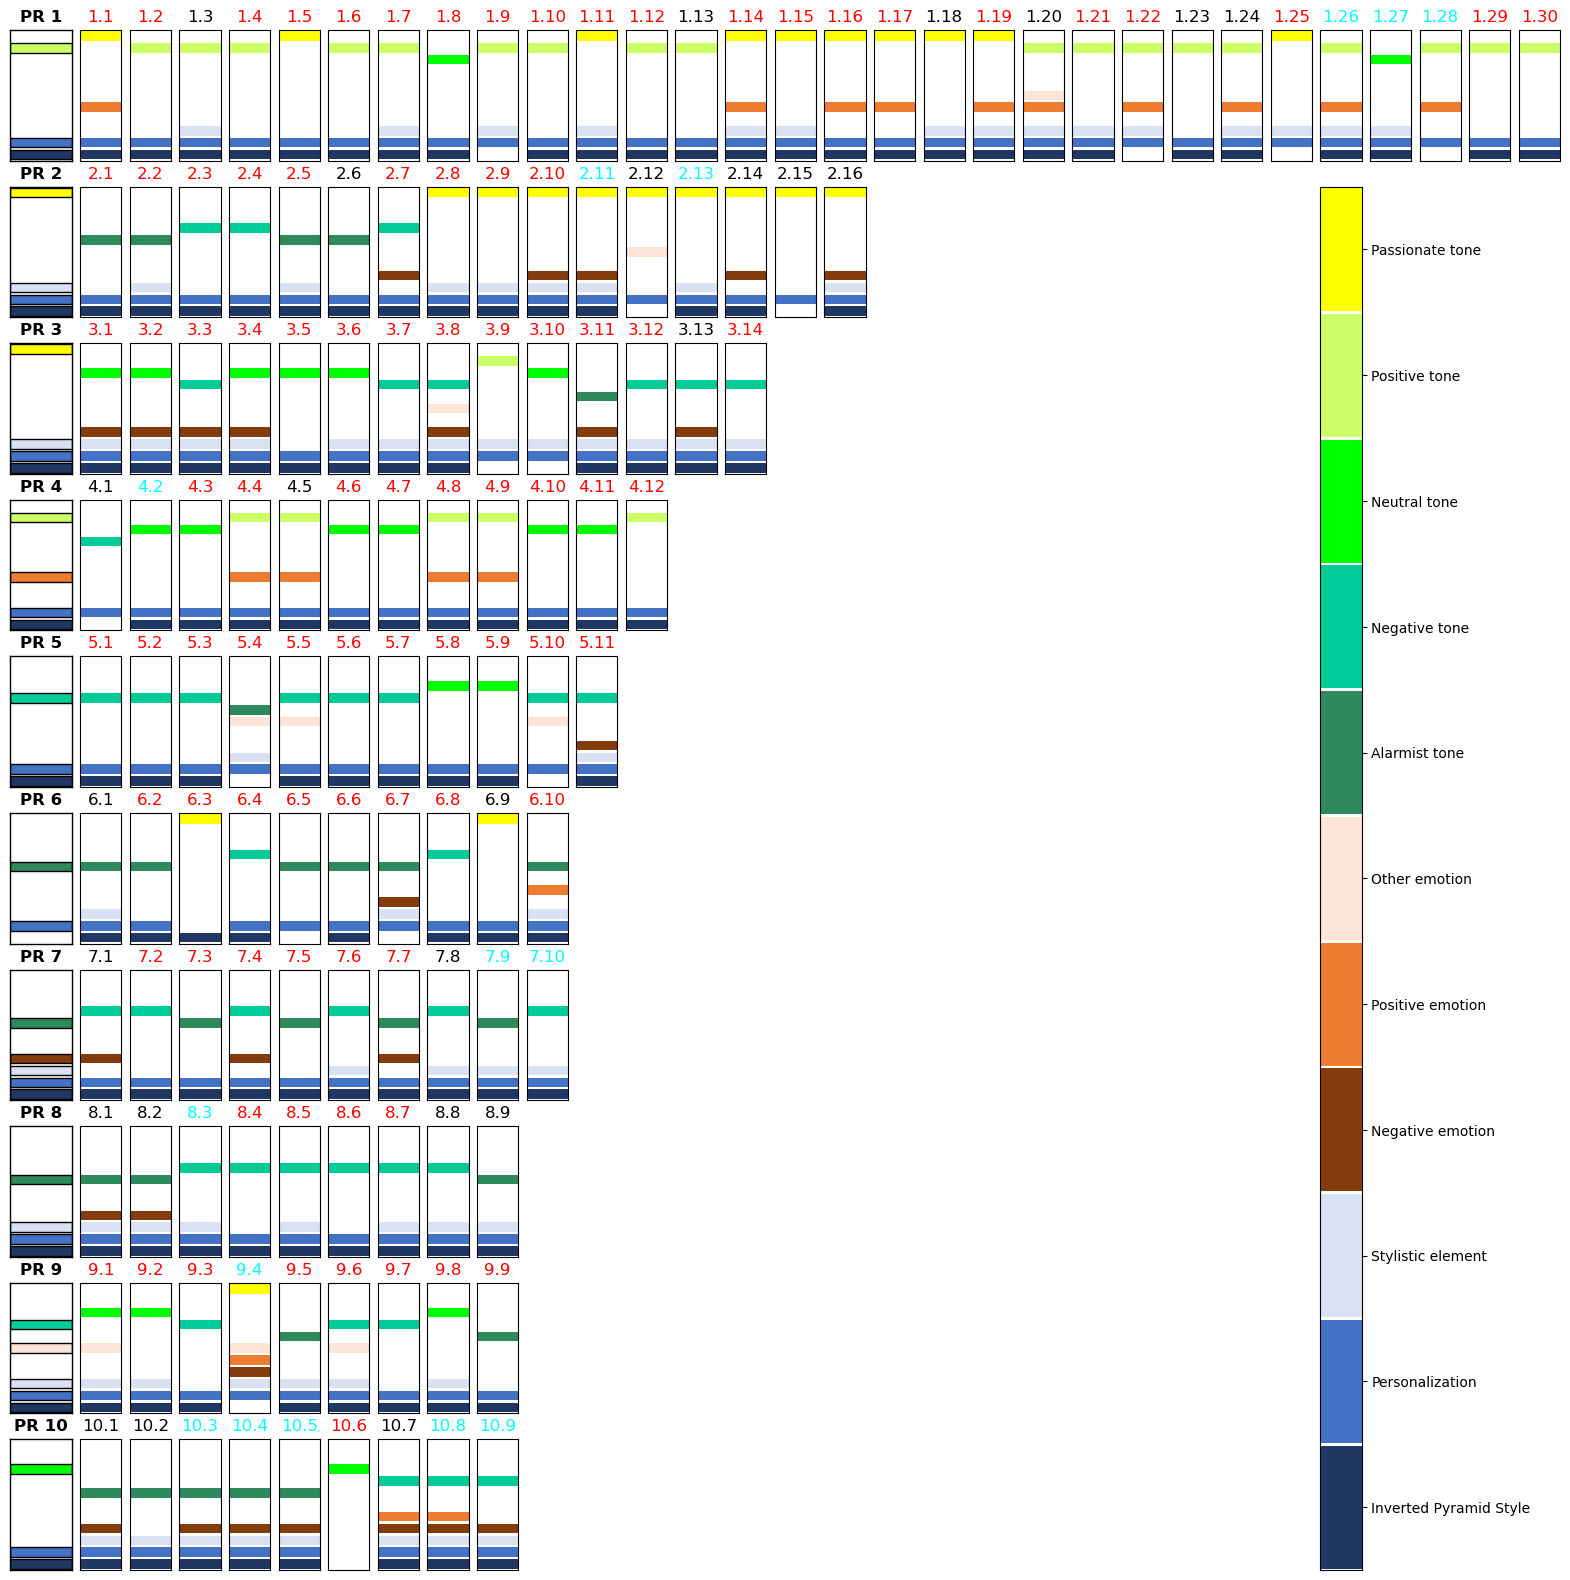

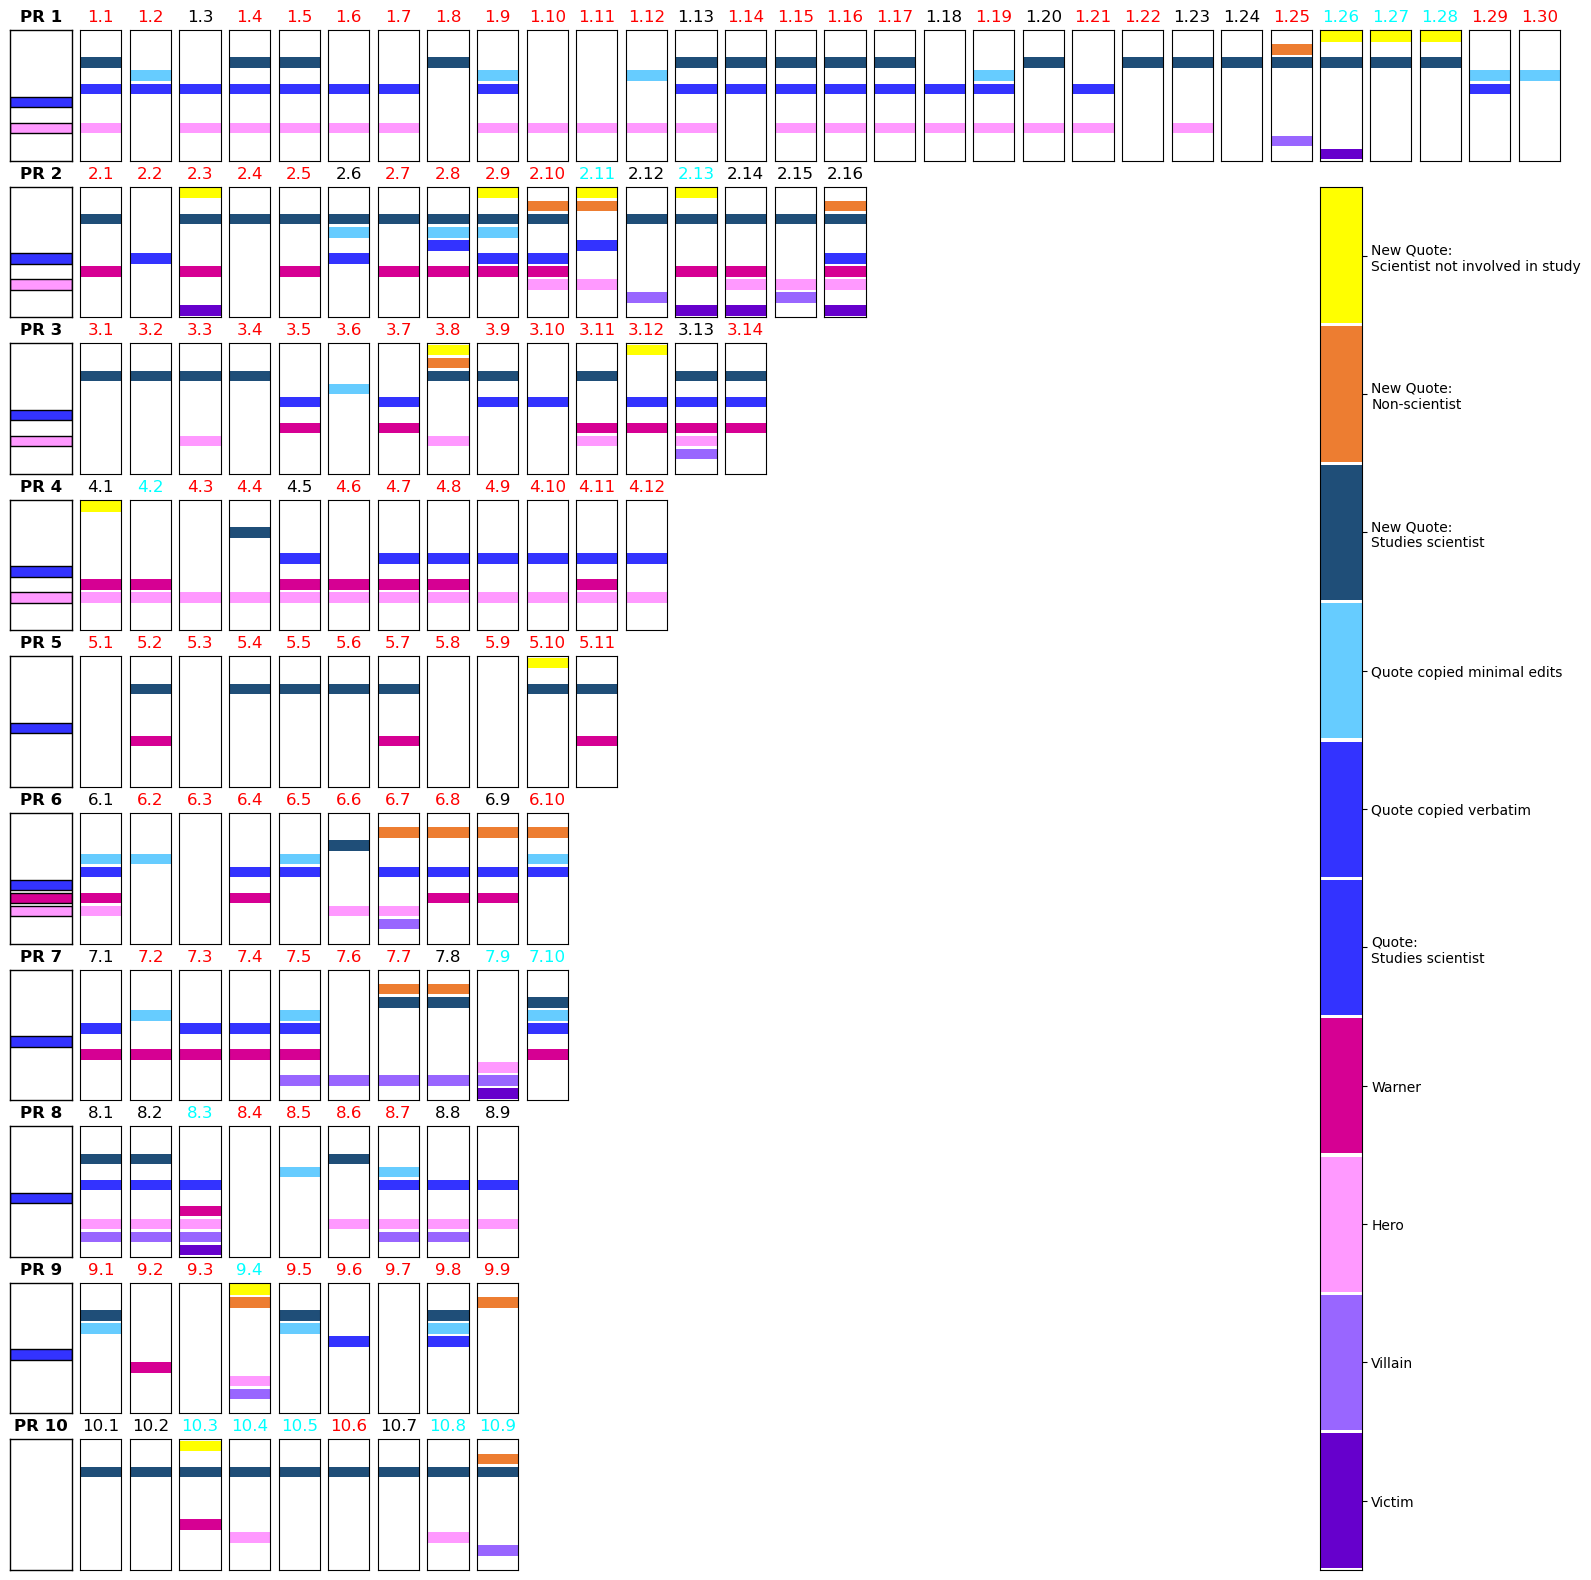

In [ ]:
all_variables = [['Problem: Human-centered',
                  'Problem: Biological',
                  'Problem: Non-biological',
                  'Problem: Treatment',
                  'Opportunities caused by ocean plastic',
                  'Opportunities caused by treatment',
                  'Cause: Politics',
                  'Cause: Industry/ Companies',
                  'Cause: Countries',
                  'Cause: Society',
                  'Responsible Treatment: Politics',
                  'Responsible Treatment: Industry/ Companies',
                  'Responsible Treatment: Countries',
                  'Responsible Treatment: Society',
                  'Urgency to take action',
                  'Treatment recommendation',
                  'Local specific information',],
                 ['Inverted Pyramid Style',
                  'Personalization',
                  'Stylistic element',
                  'Negative emotion',
                  'Positive emotion',
                  'Other emotion',
                  'Alarmist tone',
                  'Negative tone',
                  'Neutral tone',
                  'Positive tone',
                  'Passionate tone'],
                 ['Victim',
                  'Villain',
                  'Hero',
                  'Warner',
                  'Quote: Studies scientist',
                  'Quote copied verbatim',
                  'Quote copied minimal edits',
                  'New Quote: Studies scientist',
                  'New Quote: Non-scientist',
                  'New Quote: Scientist not involved in study'],
            ]

for variables in all_variables:
    visualise_pressreleases_to_newspaper_uptake(df, variables)
